### AI-07 Assignment 2   

#### Import libraries  

In [12]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

#### Read CSV file  

In [13]:
csv_in = 'reg100x50.csv'
df = pd.read_csv(csv_in, delimiter=',', skiprows=0, header=0)
print(df.shape)
print(df.info())
display(df.head())

(100, 51)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 51 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x0      100 non-null    float64
 1   x1      100 non-null    float64
 2   x2      100 non-null    float64
 3   x3      100 non-null    float64
 4   x4      100 non-null    float64
 5   x5      100 non-null    float64
 6   x6      100 non-null    float64
 7   x7      100 non-null    float64
 8   x8      100 non-null    float64
 9   x9      100 non-null    float64
 10  x10     100 non-null    float64
 11  x11     100 non-null    float64
 12  x12     100 non-null    float64
 13  x13     100 non-null    float64
 14  x14     100 non-null    float64
 15  x15     100 non-null    float64
 16  x16     100 non-null    float64
 17  x17     100 non-null    float64
 18  x18     100 non-null    float64
 19  x19     100 non-null    float64
 20  x20     100 non-null    float64
 21  x21     100 non-null    float6

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x41,x42,x43,x44,x45,x46,x47,x48,x49,y
0,0.4,-0.3,2.4,-0.3,0.1,1.6,-0.9,-0.6,0.2,-0.3,...,1.1,-0.4,-0.8,0.3,2.0,-0.5,-1.3,0.1,0.5,1.4
1,0.7,0.1,-0.4,0.0,-0.1,0.8,-0.6,-0.0,-0.1,-0.1,...,0.2,-0.1,-1.1,-0.1,-1.3,0.7,0.1,0.6,1.0,15.2
2,1.4,0.2,-1.3,-0.7,-0.6,1.2,-0.1,2.3,0.7,0.1,...,1.2,-1.3,0.8,0.2,0.1,0.5,-0.6,0.8,0.1,10.4
3,-1.4,0.9,-0.2,-0.6,-0.2,2.1,0.3,0.7,0.8,1.0,...,-0.7,0.2,-0.3,-0.5,-0.1,1.8,-0.8,-0.3,1.4,1.6
4,0.8,0.2,-1.8,0.6,0.5,1.0,-0.8,2.5,-1.2,0.7,...,0.5,-1.0,0.6,-1.7,-0.8,-0.9,0.5,0.7,-1.3,-8.5


#### Estimation of generalization performance using 5-fold cross validation  

##### Firstly, prepare for data with 25 variables ...  

In [14]:
Xh = df.loc[:, 'x25':'x49']  # explanatory variables
yh = df['y']  # objective variable
print(Xh.shape, yh.shape)

(100, 25) (100,)


##### Then execute regression calculation within CV loop  

In [15]:
skf = KFold(n_splits=4, shuffle=True, random_state=11)
mae_all = []
pred_all = pd.Series([])
true_all = pd.Series([])
for train, test in skf.split(Xh, yh):
    print(train.shape, test.shape)  # debug
    Xh_train_c = sm.add_constant(Xh.loc[train])
    model = sm.OLS(yh[train], Xh_train_c)
    results = model.fit()
    Xh_test_c = sm.add_constant(Xh.loc[test])
    yh_test_pred = results.predict(Xh_test_c)
    mae = mean_absolute_error(yh_test_pred,yh[test])
    mae_all.append(mae)
    pred_all = pd.concat([pred_all,yh_test_pred])
    true_all = pd.concat([true_all,yh[test]])

(75,) (25,)
(75,) (25,)
(75,) (25,)
(75,) (25,)


C:\Users\shugo\miniconda3\envs\ds2020\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\shugo\miniconda3\envs\ds2020\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  after removing the cwd from sys.path.


In [16]:
print(np.mean(mae_all), mae_all)
# or
#print(mean_absolute_error(pred_all,true_all))

5.2887648462959955 [4.719338898853798, 4.893810080512529, 5.722402582669904, 5.819507823147752]


**Ans. 5.29**  

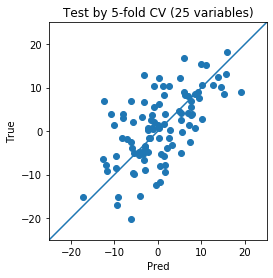

In [17]:
#print(pred_all.shape, true_all.shape)
plt.title('Test by 5-fold CV (25 variables)')
plt.xlabel('Pred')
plt.ylabel('True')
plt.scatter(pred_all, true_all)
plt.xlim(-25,25)
plt.ylim(-25,25)
plt.plot([-25,25],[-25,25])
plt.gca().set_aspect('equal', adjustable='box')
plt.show()